# LA County Crime

##### The following data is a 30-day (Aug 2017) download of Part I and Part II Crimes that occurred in the Los Angeles County Sheriff’s Department’s jurisdiction. 

* For more information, Please Visit [Los Angeles County Sheriff's Department](http://shq.lasdnews.net/CrimeStats/CAASS/desc.html)

# Introducing LA County Crime Data

In [394]:
import csv
import os
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import numpy as np

In [395]:
path = "/Users/DonginKim/Documents/Python/"
os.chdir(path)

# Removing Headers From A List Of Lists

In [396]:
with open("LA_crimes.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

In [397]:
headers = data[:1]
data = data[1:]
print(headers)

[['LURN_SAK', 'INCIDENT_DATE', 'CATEGORY', 'STAT', 'STAT_DESC', 'ADDRESS', 'STREET', 'CITY', 'ZIP', 'X_COORDINATE', 'Y_COORDINATE', 'INCIDENT_ID', 'REPORTING_DISTRICT', 'SEQ', 'UNIT_ID', 'UNIT_NAME', 'DELETED']]


# Counting Gun Deaths By Date

In [398]:
for row in data:
    row[1] = datetime.datetime.strptime(str(row[1]), "%Y-%m-%d %H:%M:%S")
    row[1] = datetime.datetime.strftime(row[1], "%Y-%m-%d")

date_counts = {}

for row in data:
    if row[1] not in date_counts:
        date_counts[row[1]] = 0
    date_counts[row[1]] += 1
date_counts

{'2017-07-23': 300,
 '2017-07-24': 408,
 '2017-07-25': 393,
 '2017-07-26': 465,
 '2017-07-27': 522,
 '2017-07-28': 459,
 '2017-07-29': 444,
 '2017-07-30': 434,
 '2017-07-31': 365,
 '2017-08-01': 396,
 '2017-08-02': 486,
 '2017-08-03': 498,
 '2017-08-04': 459,
 '2017-08-05': 417,
 '2017-08-06': 369,
 '2017-08-07': 387,
 '2017-08-08': 422,
 '2017-08-09': 442,
 '2017-08-10': 403,
 '2017-08-11': 401,
 '2017-08-12': 376,
 '2017-08-13': 363,
 '2017-08-14': 320,
 '2017-08-15': 384,
 '2017-08-16': 356,
 '2017-08-17': 326,
 '2017-08-18': 350,
 '2017-08-19': 235,
 '2017-08-20': 190,
 '2017-08-21': 90}

# Plotting Frequency of Crimes by Date

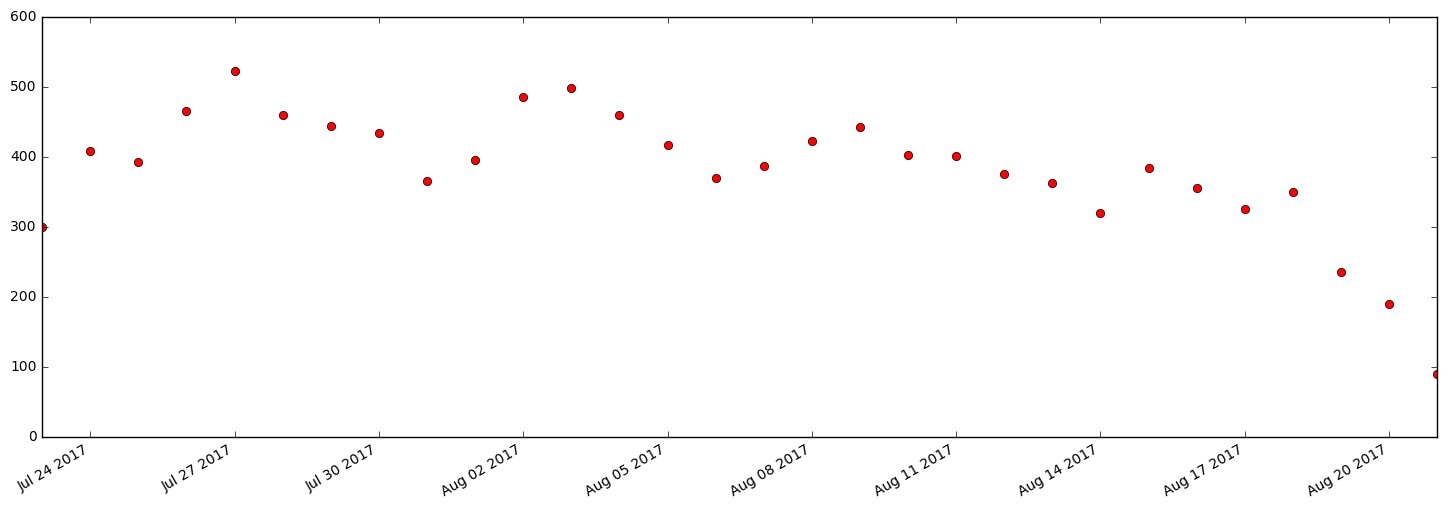

In [399]:
counts = [value for value in date_counts.values()]
time = [datetime.datetime.strptime(d, '%Y-%m-%d') for d in date_counts.keys()]

fig = plt.figure(figsize=(18,6))

plt.plot_date(time, counts, 'ro')
fig.autofmt_xdate()

plt.show()

# Exploring Crimes By Intent

In [385]:
intents = [row[2] for row in data]
intent_counts = {}
for intent in intents:
    if intent not in intent_counts:
        intent_counts[intent] = 0
    intent_counts[intent] += 1

lists = sorted(intent_counts.items(), key=operator.itemgetter(1))  #to convert the dictionary to tuple list and sort
keys, values = zip(*lists)

print(keys, values)

('FEDERAL OFFENSES W/O MONEY', 'RECEIVING STOLEN PROPERTY', 'CRIMINAL HOMICIDE', 'FEDERAL OFFENSES WITH MONEY', 'ARSON', 'DISORDERLY CONDUCT', 'FORCIBLE RAPE', 'WARRANTS', 'VAGRANCY', 'SEX OFFENSES FELONIES', 'SEX OFFENSES MISDEMEANORS', 'OFFENSES AGAINST FAMILY', 'FORGERY', 'DRUNK / ALCOHOL / DRUGS', 'DRUNK DRIVING VEHICLE / BOAT', 'FELONIES MISCELLANEOUS', 'LIQUOR LAWS', 'WEAPON LAWS', 'FRAUD AND NSF CHECKS', 'MISDEMEANORS MISCELLANEOUS', 'ROBBERY', 'AGGRAVATED ASSAULT', 'VANDALISM', 'BURGLARY', 'GRAND THEFT AUTO', 'NON-AGGRAVATED ASSAULTS', 'NARCOTICS', 'VEHICLE / BOATING LAWS', 'LARCENY THEFT') (1, 13, 15, 27, 28, 28, 34, 44, 71, 74, 88, 100, 104, 120, 131, 132, 137, 271, 290, 373, 377, 543, 792, 884, 927, 1055, 1156, 1458, 2187)


## Bar Chart

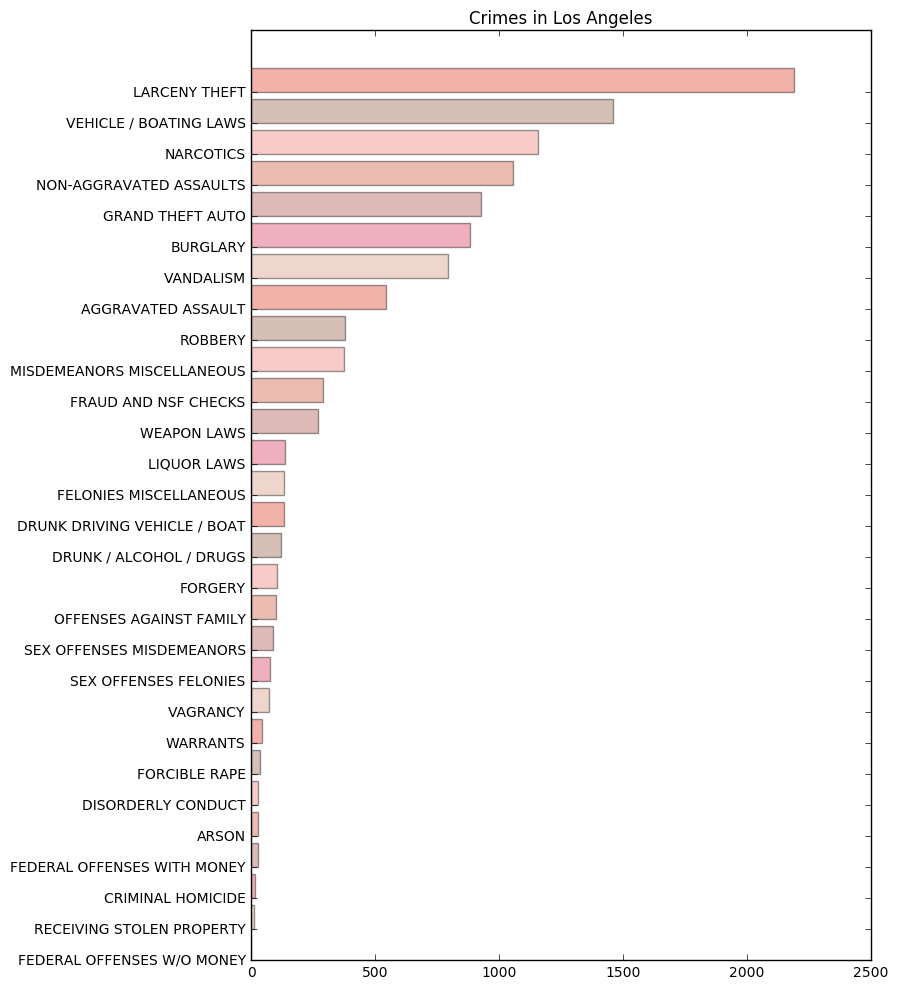

In [386]:
index = np.arange(len(keys))
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
 
plt.figure(figsize = (8,12))

plt.barh(index, values, alpha=0.4, align = 'edge',
        color=colors, ecolor='black')
plt.yticks(index, keys)
plt.title('Crimes in Los Angeles')

plt.show()

## Pie Chart

In [387]:
intent_total = sum(intent_counts.values())
intent_percent = {}
intent_percent['Misc'] = 0

for key, value in intent_counts.items():
        intent_percent[key] = value* 100. / intent_total
        if intent_percent[key] < 8:
            intent_percent['Misc'] = intent_percent['Misc'] + intent_percent[key]
            del intent_percent[key]
    
intent_percent

{'GRAND THEFT AUTO': 8.089005235602095,
 'LARCENY THEFT': 19.083769633507853,
 'Misc': 40.811518324607334,
 'NARCOTICS': 10.087260034904014,
 'NON-AGGRAVATED ASSAULTS': 9.205933682373473,
 'VEHICLE / BOATING LAWS': 12.722513089005236}

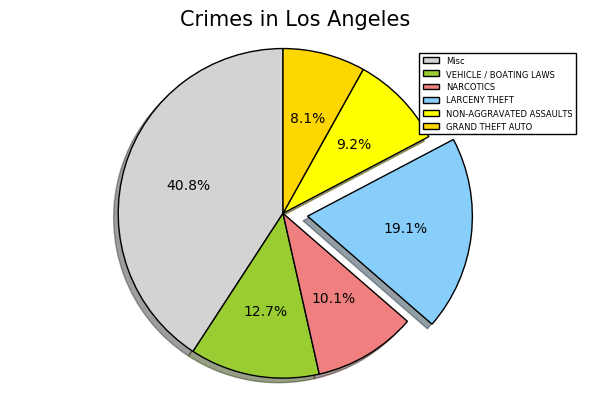

In [388]:
#Pie Chart

value = [value for value in intent_percent.values()]
key = [key for key in intent_percent.keys()]
colors = ['lightgrey', 'yellowgreen', 'lightcoral', 'lightskyblue', 'yellow', 'gold']
explode=(0, 0, 0, 0.15, 0, 0)

plt.pie(value, colors=colors, explode=explode, shadow=True,
        autopct='%1.1f%%', startangle=90)

plt.title('Crimes in Los Angeles', y=1.05, fontsize=15) #distance from plot and size
plt.legend( loc="best", labels=key,  prop={'size': 6}) 
plt.tight_layout()
plt.axis('equal')
plt.show()

# Exploring Crimes by City

In [389]:
cities = [row[7] for row in data]

city_counts = {}

for city in cities:
    if city not in city_counts:
        city_counts[city] = 0
    city_counts[city] += 1
    
'''
for key, value in city_counts.items():
    if city_counts[key] < 30:
        city_counts['Others'] = city_counts['Others'] + city_counts[key]
                
for key in list(city_counts.keys()): 
    if city_counts[key] < 30:
        del city_counts[key]
''' 

del city_counts['']  #del 'blank' keys

lists = sorted(city_counts.items(), key=operator.itemgetter(1))  #to convert the dictionary to tuple list and sort
keys, values = zip(*lists)


print(keys, values)


('SANTA FE SPRINGS', 'FAIR OAKS PARK', 'FONTANA', 'NORTHRIDGE', 'REDONDO BEACH', 'SOUTH PASADENA', 'SANTA ANA', 'NEENACH', 'ALHAMBRA', 'LADERA HEIGHTS', 'SPRINGDALE', 'RANCHO CUCAMONGA', 'BELL', 'ANAHEIM', 'BRADBURY', 'EL SEGUNDO', 'LEBEC', 'HENDERSON', 'CHINO', 'BELL GARDENS', 'LAS VEGAS', 'BALDWIN PARK', 'ORANGEBURG', 'ONTARIO', 'KAGEL CANYON', 'PALOS VERDES PENINSULA', 'TUJUNGA', 'MONTCLAIR, SBD LINE', 'ROSEWOOD', 'SIGNAL HILL', 'PALOS VERDES ESTATES', 'GLENDALE', 'SAN FERNANDO', 'PEARBLOSSOM', 'LAKE HUGHES', 'MONTEREY PARK', 'LAKE L A', 'UPLAND', 'WOODLAND HILLS', 'COVINA HILLS', 'BEVERLY HILLS', 'CATALINA', 'VALLEY GLEN', 'LLANO', 'WILMINGTON', 'AGUA DULCE', 'LEONA VALLEY', 'VAL VERDE', 'CLAREMONT', 'HIDDEN HILLS', 'ROLLING HILLS', 'IRWINDALE', 'VAN NUYS', 'CULVER CITY', 'LA VERNE', 'SAN GABRIEL MTNS', 'DOWNEY', 'UNKNOWN', 'DOMINGUEZ', 'QUARTZ HILL', 'SOUTH GATE', 'LAKE LOS ANGELES', 'SAN PEDRO', 'WALNUT PARK', 'TOPANGA', 'GORMAN', 'LONG BEACH', 'SANTA MONICA', 'MONTROSE', 'MONROV

## Bar Chart

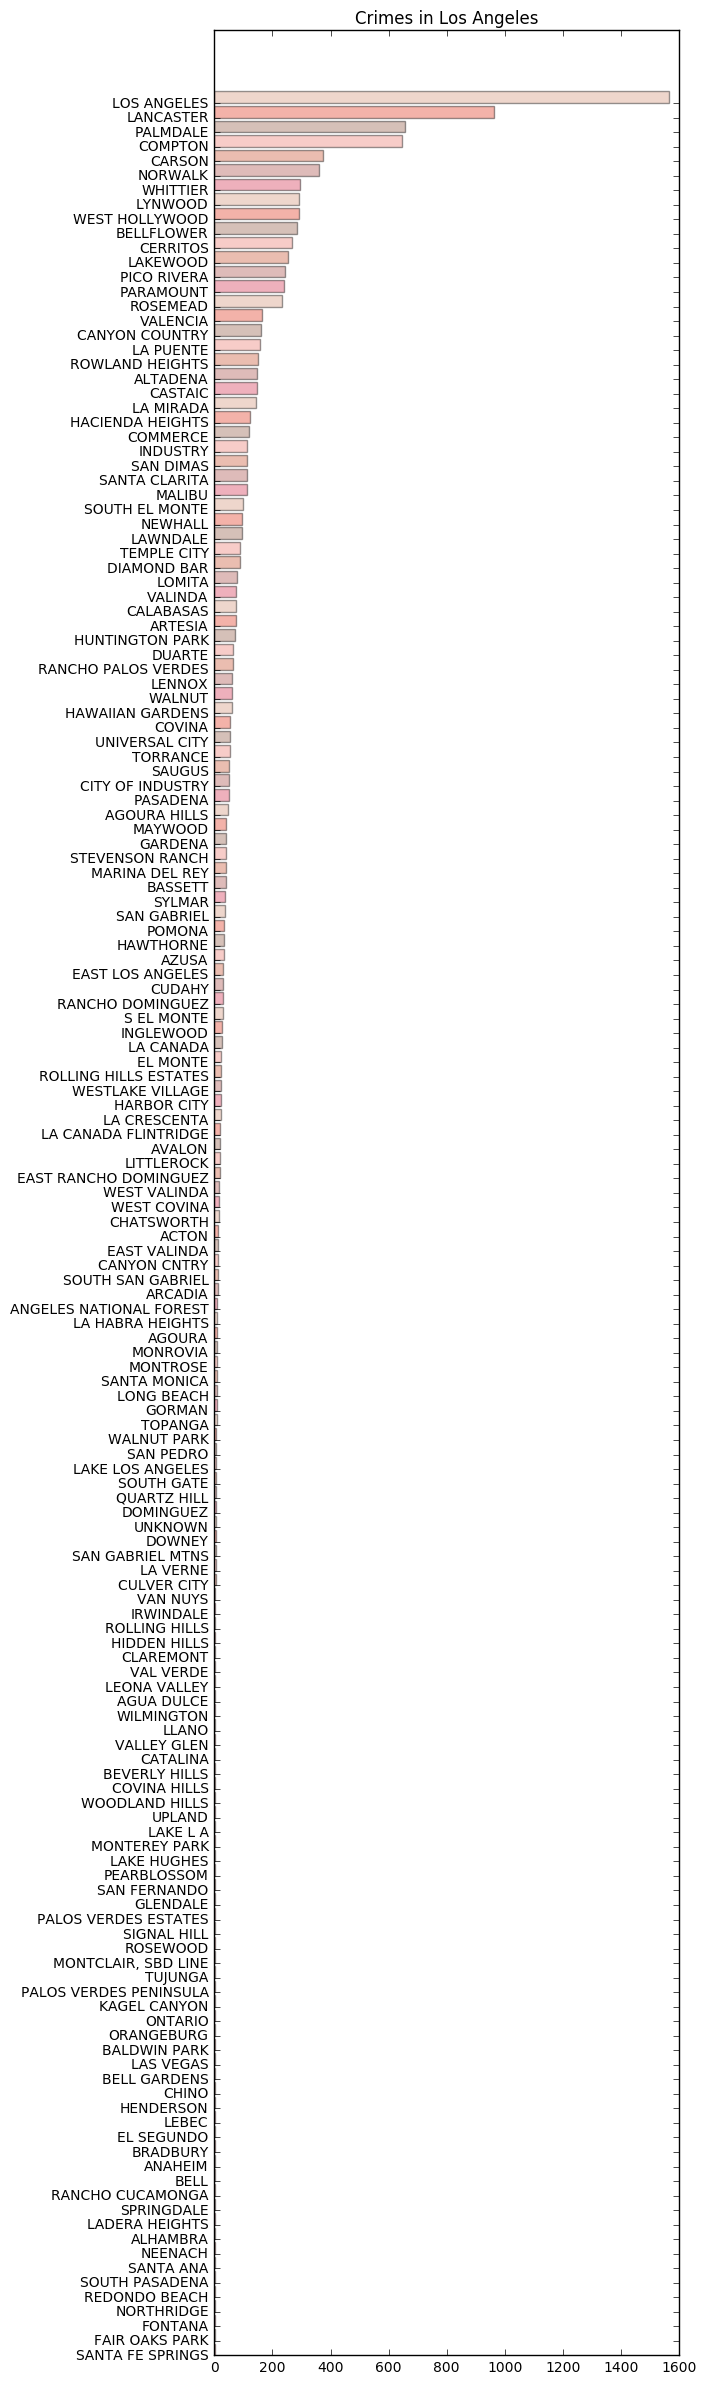

In [390]:
index = np.arange(len(keys))
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
 
plt.figure(figsize = (6,30))

plt.barh(index, 
         values,
         alpha=0.4,
         align='edge',
         color=colors, 
         ecolor='black')


plt.yticks(index, keys)
plt.title('Crimes in Los Angeles')

plt.show()

## Pie Chart

In [391]:
city_total = sum(city_counts.values())
city_percent = {}
city_percent['Others'] = 0

for key, value in city_counts.items():
        city_percent[key] = value* 100. / city_total
        if city_percent[key] < 5:
            city_percent['Others'] = city_percent['Others'] + city_percent[key]
            del city_percent[key]

city_percent


{'COMPTON': 5.712519865795515,
 'LANCASTER': 8.50256048031079,
 'LOS ANGELES': 13.80893519336041,
 'Others': 66.19283065512981,
 'PALMDALE': 5.783153805403496}

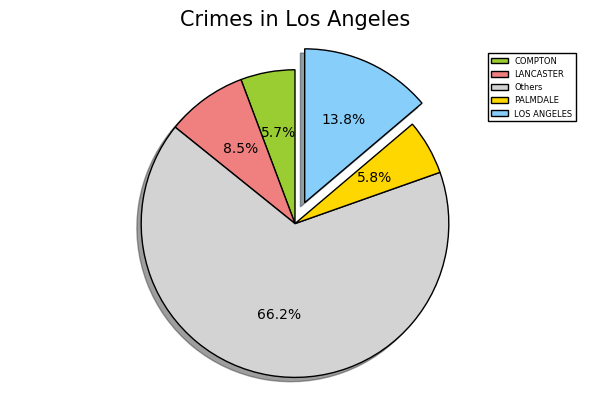

In [392]:
#Pie Chart

value = [value for value in city_percent.values()]
key = [key for key in city_percent.keys()]
colors = ['yellowgreen', 'lightcoral', 'lightgrey', 'gold','lightskyblue']
explode=(0, 0, 0, 0, 0.15)

plt.pie(value, colors=colors, explode=explode, shadow=True,
        autopct='%1.1f%%', startangle=90)

plt.title('Crimes in Los Angeles', y=1.05, fontsize=15) #distance from plot and size
plt.legend( loc="best", labels=key,  prop={'size': 6}) 
plt.tight_layout()
plt.axis('equal')
plt.show()

# Findings

It appears that crimes in Los Angeles County are primarily in the level of misdemeanour and disproportionately concentrated in the city of Los Angeles.

Some areas to investigate further:

* The link between day of the week and crime rate.
* Crime rate by gender.
* The rates of other intents by gender and race.
* Crime rates by location and education.